### Generate Image Data

##### 1. Sample over P to choose a class

##### 2. Sample over set of class prototypes to choose a prototype (for example: a person class can have man, woman, child, prototypes)

##### 3. Sample over parameters of prototype (each prototype has a generator function, with parameters)

##### 4. Generate instance with sampled parameters

In [7]:
from PIL import Image, ImageDraw
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

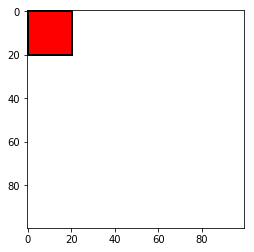

In [16]:
mode = 'RGB'
size = (100, 100)
color = 'white'
im = Image.new(mode, size, color)

draw = ImageDraw.Draw(im)
draw.rectangle([0,0,20,20], 'red', 'black')
imshow(np.asarray(im))

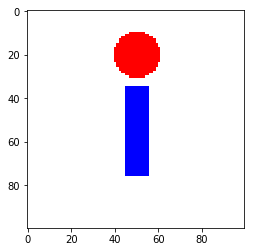

In [39]:
def draw_dog(draw, x = 0, y = 0):
    origin = np.array([x, y])
    head_origin = origin + np.array([10, 20])
    head_size = np.array([20, 20])
    head = head_origin + head_size
    draw.ellipse([tuple(head_origin), tuple(head)], 'red', None)
    
    body_origin = head + np.array([0, 0])
    body_size = np.array([40, 10])
    body = body_origin + body_size
    draw.rectangle([tuple(body_origin), tuple(body)], 'blue', None)
    
def draw_person(draw, x = 0, y = 0):
    origin = np.array([x, y])
    head_origin = origin + np.array([40, 10])
    head_size = np.array([20, 20])
    head = head_origin + head_size
    draw.ellipse([tuple(head_origin), tuple(head)], 'red', None)
    
    body_origin = head + np.array([-15, 5])
    body_size = np.array([10, 40])
    body = body_origin + body_size
    draw.rectangle([tuple(body_origin), tuple(body)], 'blue', None)
    
def draw(draw_fn):
    mode = 'RGB'
    size = (100, 100)
    color = 'white'
    im = Image.new(mode, size, color)

    draw = ImageDraw.Draw(im)
    draw_fn(draw)
    imshow(np.asarray(im))
    
draw(draw_person)